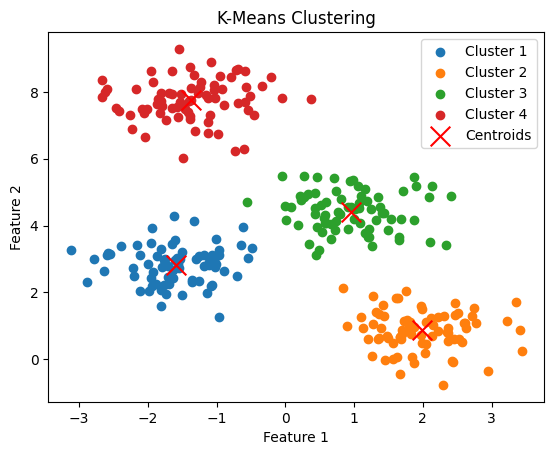

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate a sample dataset (for demonstration)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# K-Means implementation
def kmeans(X, n_clusters, max_iterations=100):
    # Step 1: Randomly initialize K centroids
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for iteration in range(max_iterations):
        # Step 2: Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)

        # Step 3: Compute new centroids as the mean of assigned points
        new_centroids = np.array([X[cluster_labels == k].mean(axis=0) for k in range(n_clusters)])

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, cluster_labels

# Set the number of clusters
n_clusters = 4

# Apply K-Means
centroids, cluster_labels = kmeans(X, n_clusters)

# Visualization of clusters
for i in range(n_clusters):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f"Cluster {i + 1}")

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x', label='Centroids')
plt.legend()
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
